In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

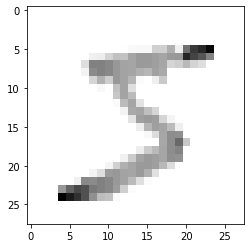

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
#print(x_train[0])

plt.imshow(x_train[0], cmap =plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu ))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 

pass

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

2022-02-05 22:16:34.329461: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-05 22:16:34.477389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2686 - accuracy: 0.9218
Epoch 2/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1108 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0752 - accuracy: 0.9761


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

 42/313 [===>..........................] - ETA: 1s - loss: 0.1307 - accuracy: 0.9568

2022-02-05 22:17:10.173368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.1090 - accuracy: 0.9667
0.10898575931787491 0.96670001745224


In [11]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

predictions = new_model.predict([x_test])
print(predictions)

print(np.argmax(predictions[0]))

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


2022-02-05 22:19:20.259648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[[6.4031958e-09 1.5526516e-07 1.4421125e-05 ... 9.9995542e-01
  1.7233141e-06 3.2693990e-08]
 [3.9373056e-09 7.5967931e-05 9.9985921e-01 ... 3.3076286e-10
  2.1110020e-06 1.1552033e-11]
 [2.0115449e-08 9.9920231e-01 1.2059868e-04 ... 2.5866779e-05
  6.3436903e-04 2.4641361e-07]
 ...
 [3.7607702e-08 3.2764588e-06 8.4194767e-07 ... 3.2217642e-05
  9.3145631e-05 4.5839045e-04]
 [1.1586366e-07 5.3793156e-07 3.0812245e-08 ... 2.9750371e-08
  6.9337399e-03 1.2627526e-09]
 [6.0462611e-08 4.3635096e-09 2.1929400e-06 ... 1.7498469e-10
  1.8859298e-06 3.4800845e-08]]
7


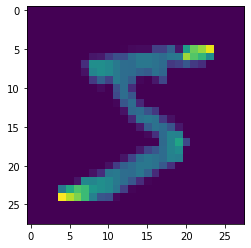

In [10]:
plt.imshow(x_train[0])
plt.show()